# Import Libraries

In [105]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load Data

##### Note: Because of not have correct need Dataset i am using my Own Example.

In [106]:
data = {
    'Title': ['Movie A', 'Movie B', 'Movie C', 'Movie D', 'Movie E'],
    'Genre': ['Drama', 'Comedy', 'Action', 'Thriller', 'Sci-Fi'],
    'Director': ['Director X', 'Director Y', 'Director Z', 'Director X', 'Director Y'],
    'Actors': ['Actor A, Actor B', 'Actor C, Actor D', 'Actor E, Actor F', 'Actor G, Actor H', 'Actor I, Actor J'],
    'Year': [2015, 2018, 2020, 2017, 2019],
    'Runtime': [120, 90, 150, 110, 130],
    'Rating': [8.2, 7.5, 8.7, 6.9, 7.9]
}
df = pd.DataFrame(data)

# Display the DataFrame

In [107]:
df.head()

,Title,Genre,Director,Actors,Year,Runtime,Rating
0,Movie A,Drama,Director X,"Actor A, Actor B",2015,120,8.2
1,Movie B,Comedy,Director Y,"Actor C, Actor D",2018,90,7.5
2,Movie C,Action,Director Z,"Actor E, Actor F",2020,150,8.7
3,Movie D,Thriller,Director X,"Actor G, Actor H",2017,110,6.9
4,Movie E,Sci-Fi,Director Y,"Actor I, Actor J",2019,130,7.9


# Data Preprocessing


In [108]:
encoder = OneHotEncoder(sparse_output=False)
encoded_genre = encoder.fit_transform(df[['Genre']])
encoded_director = encoder.fit_transform(df[['Director']])
encoded_actors = encoder.fit_transform(df[['Actors']])

# Combine encoded features with the original dataframe


In [109]:
encoded_features = np.concatenate([encoded_genre, encoded_director, encoded_actors], axis=1)
X = np.concatenate([encoded_features, df[['Year', 'Runtime']].values], axis=1)
y = df['Rating']

# Split the data into training and testing set

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and Train the Model


In [111]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluate the Model


In [112]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Visualize Results


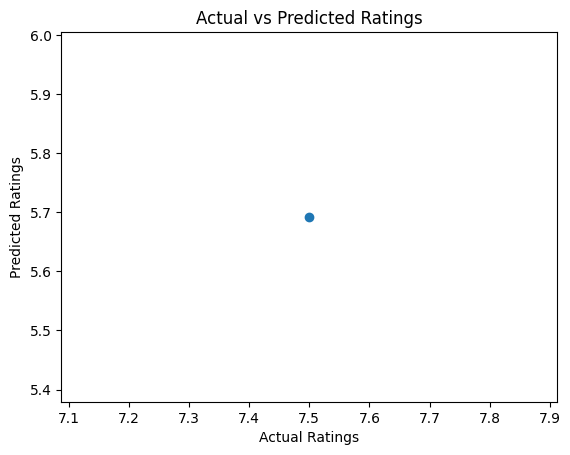

In [113]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()